In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("breast_cancer_bd.csv")
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [23]:
df.rename(columns={'Sample code number':'Id'},inplace=True)

In [25]:
df.head()

,Id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [27]:
df.drop('Id',axis=1,inplace=True)

In [29]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [31]:
df.dtypes

Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [43]:
df['Bare Nuclei']=df['Bare Nuclei'].astype(int)

ValueError: invalid literal for int() with base 10: '?'

In [45]:
df['Bare Nuclei'][23]

'?'

In [49]:
df['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [51]:
df['Bare Nuclei'].isnull().sum()

0

In [63]:
df['Bare Nuclei'] = df['Bare Nuclei'].replace('?', np.nan)

In [65]:
df['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [67]:
df['Bare Nuclei'].isnull().sum()

16

In [83]:
df['Bare Nuclei']=df['Bare Nuclei'].fillna(df['Bare Nuclei'].mode()[0])

In [85]:
df['Bare Nuclei'].isnull().sum()

0

In [103]:
df['Bare Nuclei']=df['Bare Nuclei'].astype(int)

In [105]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

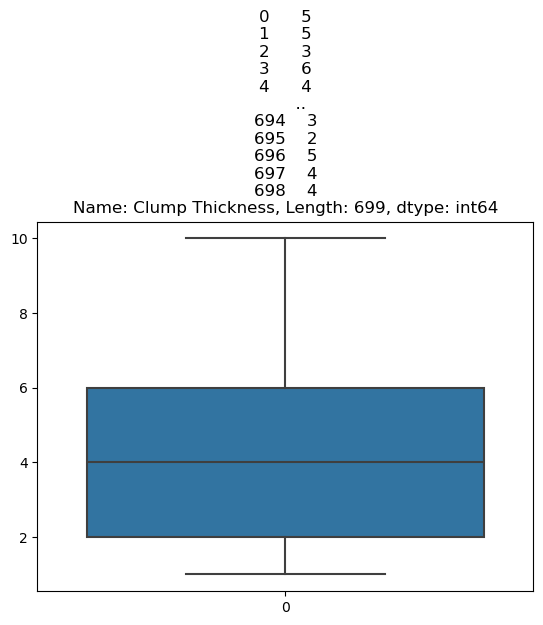

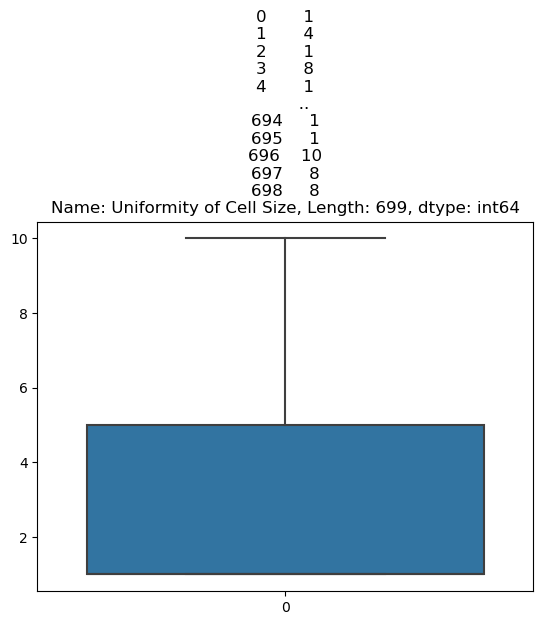

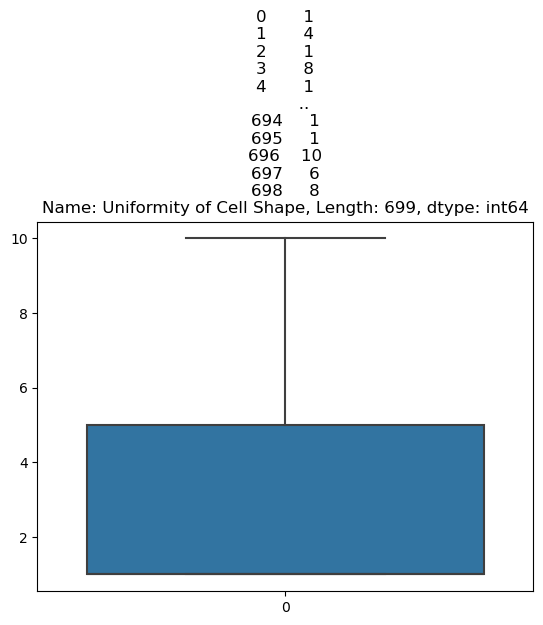

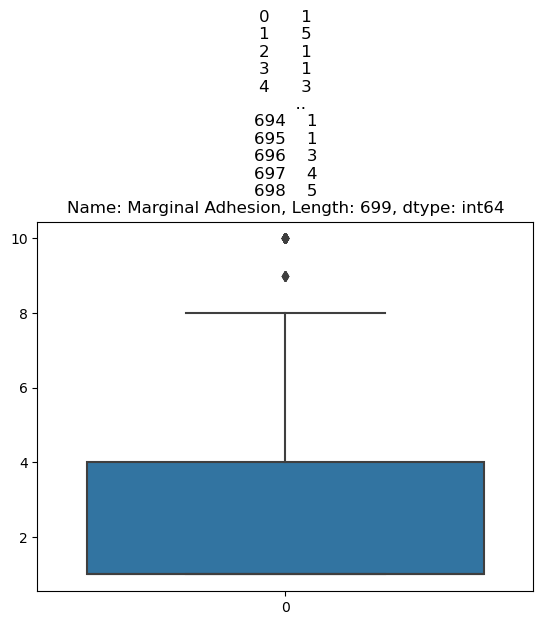

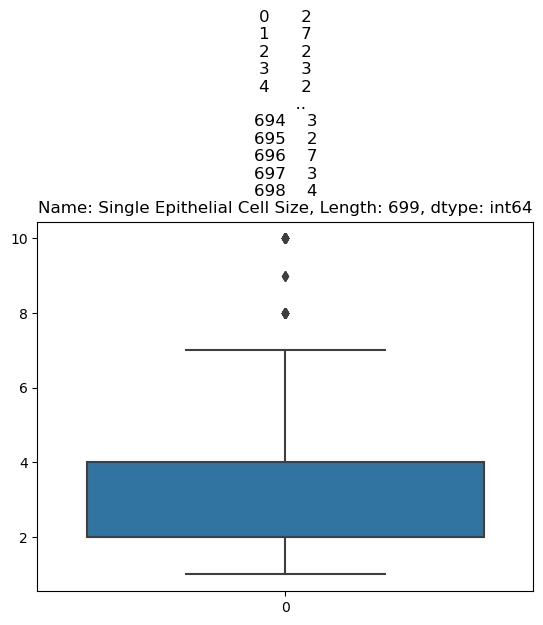

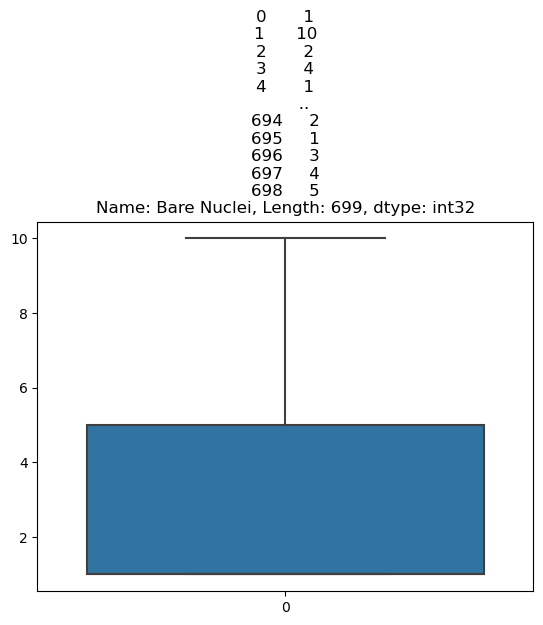

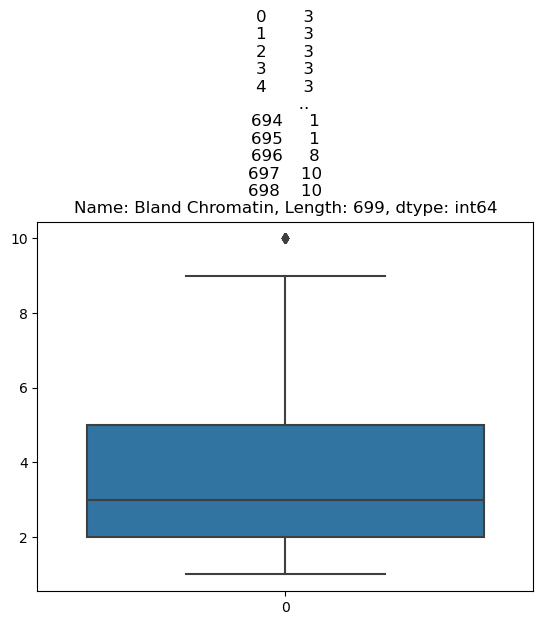

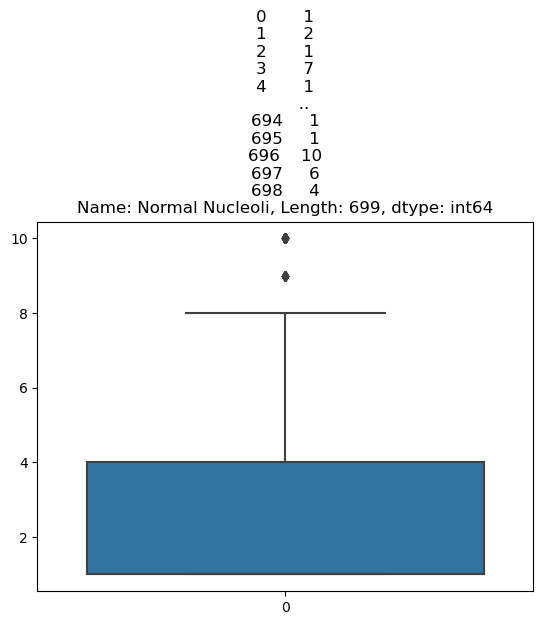

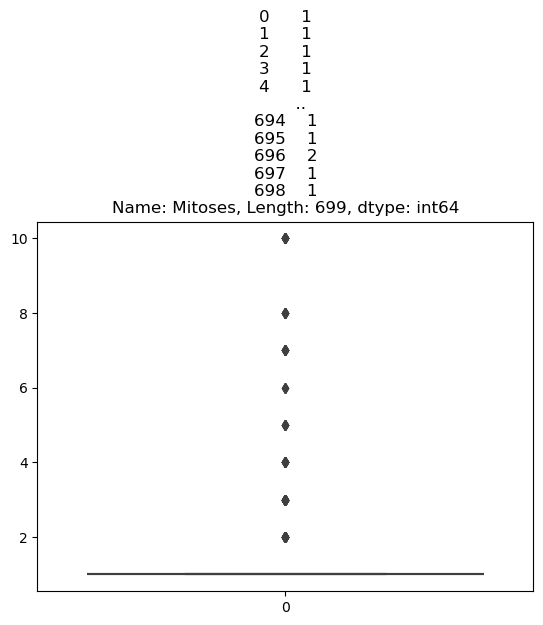

In [107]:
cols=df[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']]
for i in cols:
    sns.boxplot(df[i])
    plt.title(df[i])
    plt.show()

In [109]:
def detect_outliers_iqr(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = [x for x in data if x < lower or x > upper]
    return outliers

for col in cols:
    outlier=detect_outliers_iqr(df[col])
    print("Column: {}  Outliers: {}".format(col,outlier))


Column: Clump Thickness  Outliers: []
Column: Uniformity of Cell Size  Outliers: []
Column: Uniformity of Cell Shape  Outliers: []
Column: Marginal Adhesion  Outliers: [10, 10, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 10, 10, 10, 10, 10, 10, 10]
Column: Single Epithelial Cell Size  Outliers: [8, 8, 10, 8, 10, 8, 10, 8, 10, 8, 10, 10, 10, 10, 8, 10, 10, 8, 9, 10, 8, 8, 10, 8, 8, 10, 8, 10, 10, 10, 10, 8, 8, 10, 10, 10, 8, 10, 9, 10, 10, 10, 8, 10, 8, 8, 10, 10, 10, 10, 8, 10, 10, 8]
Column: Bare Nuclei  Outliers: []
Column: Bland Chromatin  Outliers: [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
Column: Normal Nucleoli  Outliers: [10, 9, 10, 10, 9, 10, 9, 9, 9, 10, 10, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 10, 9, 10, 10, 9, 10, 10, 10, 10, 10, 10, 10, 9, 9

In [117]:
df.corr()['Class'].sort_values(ascending=False)

Class                          1.000000
Bare Nuclei                    0.818968
Uniformity of Cell Shape       0.818934
Uniformity of Cell Size        0.817904
Bland Chromatin                0.756616
Clump Thickness                0.716001
Normal Nucleoli                0.712244
Marginal Adhesion              0.696800
Single Epithelial Cell Size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64

<Axes: >

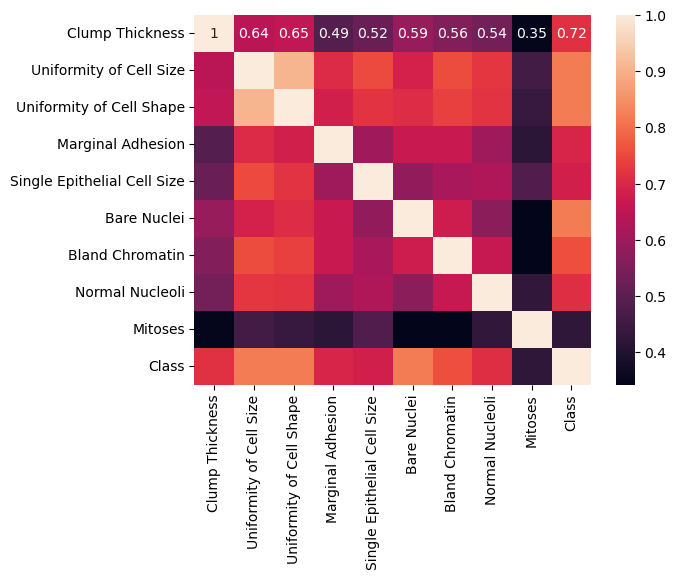

In [127]:
sns.heatmap(df.corr(),annot=True)

In [129]:
X=df.drop(['Class'],axis=1)
y=df['Class']

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [151]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [161]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [163]:
y_pred = knn.predict(X_test)
y_pred

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2,
       2, 4, 4, 2, 2, 4, 2, 2], dtype=int64)

In [165]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: ',(accuracy_score(y_test, y_pred)))

Model accuracy score:  0.9714285714285714


In [167]:
y_pred_train = knn.predict(X_train)

In [171]:
print('Training-set accuracy score: ',(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score:  0.9821109123434705


In [173]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9821
Test set score: 0.9714


###
The training-set accuracy score is 0.9821 while the test-set accuracy to be 0.9714. These two values are quite comparable. So, there is no question of overfitting.

In [182]:
for i in range(4,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f'Model accuracy score with k={i} : {accuracy_score(y_test, y_pred)}')

Model accuracy score with k=4 : 0.9642857142857143
Model accuracy score with k=5 : 0.9714285714285714
Model accuracy score with k=6 : 0.9785714285714285
Model accuracy score with k=7 : 0.9785714285714285
Model accuracy score with k=8 : 0.9785714285714285
Model accuracy score with k=9 : 0.9714285714285714


In [184]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[82  3]
 [ 1 54]]


In [186]:
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train, y_train)
y_pred_7 = knn_7.predict(X_test)
cm_7 = confusion_matrix(y_test, y_pred_7)

print('Confusion matrix\n\n', cm_7)

Confusion matrix

 [[83  2]
 [ 1 54]]


##### So, kNN Classification model with k=7 shows more accurate predictions and less number of errors than k=3 model. Hence, we got performance improvement with k=7.

In [195]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_7))

              precision    recall  f1-score   support

           2       0.99      0.98      0.98        85
           4       0.96      0.98      0.97        55

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



In [197]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn_7, X_train, y_train, cv = 10, scoring='accuracy')

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9643
